In [1]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import numpy as np

# Mac에서는 "AppleGothic" 사용
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

In [2]:
import pandas as pd

# vip_df.csv와 combined_201812.csv 파일 불러오기
vip_df = pd.read_csv("vip_df.csv")
combined_df = pd.read_csv("../data/combined_cde.csv")

# vip_df에서 'Segment' 컬럼 포함하여 병합
vip_cde = pd.merge(vip_df[['ID', 'Segment']], combined_df, on='ID', how='inner')  # ID를 기준으로 병합

# 병합된 데이터프레임 확인
vip_cde.head()  # 상위 5개 행을 확인

,ID,Segment,이용금액_R3M_신용체크,_1순위카드이용금액,이용금액_R3M_신용,이용금액_일시불_R3M,정상입금원금_B0M,이용금액_오프라인_R6M,정상청구원금_B0M,이용건수_신용_R6M,...,정상입금원금_B2M,이용금액_일시불_B0M,정상청구원금_B5M,최대이용금액_일시불_R12M,이용가맹점수,이용건수_신용_R12M,이용금액_일시불_R6M,청구금액_R3M,청구금액_B0,청구금액_R6M
0,TRAIN_000000,D,-454,3027,-454,3180,7200,23609,15067,46,...,7293,1079,14440,6513,6,147,7183,42163,13976,85879
1,TRAIN_000002,C,27336,26968,27336,21278,18912,43371,26184,106,...,15563,8373,21929,3968,40,149,39681,84250,31404,156628
2,TRAIN_000003,D,4270,4807,4270,3211,9657,24783,20959,54,...,9402,780,18563,9749,21,107,6352,72964,25628,124621
3,TRAIN_000008,C,131011,59033,128282,69490,21371,91896,25321,453,...,24555,22941,27704,44586,98,911,138978,95297,34291,159044
4,TRAIN_000012,D,69554,39049,69554,49052,14249,74339,14762,372,...,12690,15691,18239,23057,82,708,99951,44807,16485,91492


In [6]:
vip_cde.isnull().sum()

ID                 0
Segment            0
이용금액_R3M_신용체크      0
_1순위카드이용금액         0
이용금액_R3M_신용        0
이용금액_일시불_R3M       0
정상입금원금_B0M         0
이용금액_오프라인_R6M      0
정상청구원금_B0M         0
이용건수_신용_R6M        0
이용금액_오프라인_R3M      0
이용건수_일시불_R12M      0
이용금액_오프라인_B0M      0
이용금액_일시불_R12M      0
정상입금원금_B5M         0
이용건수_오프라인_B0M      0
정상청구원금_B2M         0
이용건수_신판_R12M       0
정상입금원금_B2M         0
이용금액_일시불_B0M       0
정상청구원금_B5M         0
최대이용금액_일시불_R12M    0
이용가맹점수             0
이용건수_신용_R12M       0
이용금액_일시불_R6M       0
청구금액_R3M           0
청구금액_B0            0
청구금액_R6M           0
dtype: int64

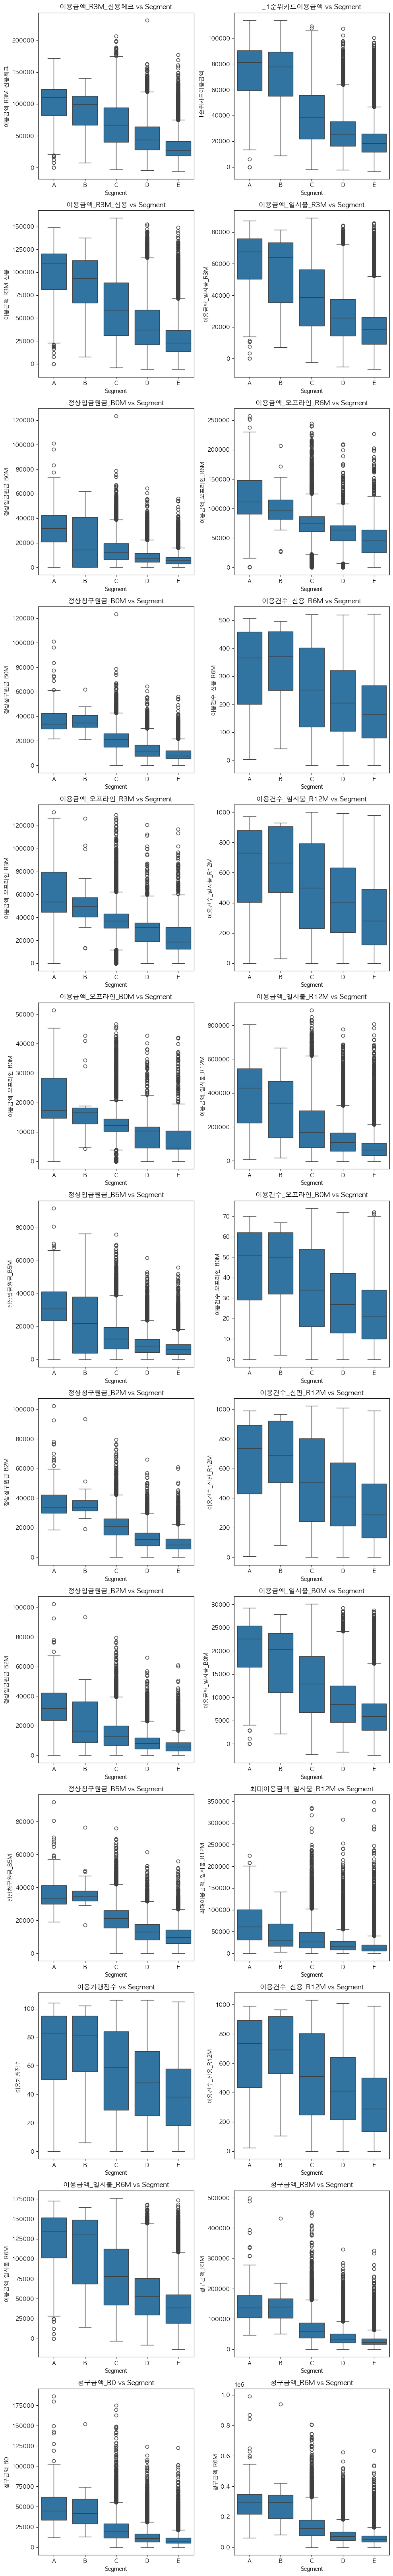

In [10]:
# 1. 'ID'와 'Segment' 컬럼을 제외한 나머지 컬럼만 선택
columns_to_plot = vip_cde.drop(columns=['ID', 'Segment']).columns

# 2. Segment 순서를 A, B, C, D, E로 지정
segment_order = ['A', 'B', 'C', 'D', 'E']

# 3. 그래프 크기 및 서브플롯 설정 (2열로 출력)
num_plots = len(columns_to_plot)
num_rows = (num_plots // 2) + (num_plots % 2)  # 2열로 출력하되, 나머지는 한 줄에 출력

# 4. 서브플롯 생성
plt.figure(figsize=(10, num_rows * 5))

# 각 컬럼에 대해 박스플롯 그리기
for i, column in enumerate(columns_to_plot):
    plt.subplot(num_rows, 2, i + 1)  # 2열로 배치
    sns.boxplot(x='Segment', y=column, data=vip_cde, order=segment_order)
    plt.title(f'{column} vs Segment')  # 제목 추가
    plt.tight_layout()

plt.show()